### **_TRABAJO DE CLASE MISION 2_**

## **CREACION BASE DE DATOS 'bolsosac'**

##### _Descripcion del negocio - Codigo MySQL_
**Idea de negocio:** **bolsosac**
_"Crear experiencias exclusivas a través de productos de diseño original, calidad superior y fabricación consciente,
impulsando el estilo único de nuestros clientes mediante bolsos, zapatillas y accesorios
que reflejan autenticidad, elegancia y distinción"_

```sql
-- MySQL Workbench Forward Engineering

SET @OLD_UNIQUE_CHECKS=@@UNIQUE_CHECKS, UNIQUE_CHECKS=0;
SET @OLD_FOREIGN_KEY_CHECKS=@@FOREIGN_KEY_CHECKS, FOREIGN_KEY_CHECKS=0;
SET @OLD_SQL_MODE=@@SQL_MODE, SQL_MODE='ONLY_FULL_GROUP_BY,STRICT_TRANS_TABLES,NO_ZERO_IN_DATE,NO_ZERO_DATE,ERROR_FOR_DIVISION_BY_ZERO,NO_ENGINE_SUBSTITUTION';

-- -----------------------------------------------------
-- Schema bolsosac
-- -----------------------------------------------------

-- -----------------------------------------------------
-- Schema bolsosac
-- -----------------------------------------------------
CREATE SCHEMA IF NOT EXISTS `bolsosac` DEFAULT CHARACTER SET utf8mb4 ;
USE `bolsosac` ;

-- -----------------------------------------------------
-- Table `bolsosac`.`clientes`
-- -----------------------------------------------------
CREATE TABLE IF NOT EXISTS `bolsosac`.`clientes` (
  `ID_clientes` INT NOT NULL AUTO_INCREMENT,
  `Nombre` VARCHAR(45) NULL,
  `Apellido` VARCHAR(45) NULL,
  `Correo` VARCHAR(45) NULL,
  `Teléfono` VARCHAR(45) NULL,
  `Dirección` VARCHAR(45) NULL,
  `Fecha_registro` DATETIME NULL,
  PRIMARY KEY (`ID_clientes`))
ENGINE = InnoDB;


-- -----------------------------------------------------
-- Table `bolsosac`.`productos`
-- -----------------------------------------------------
CREATE TABLE IF NOT EXISTS `bolsosac`.`productos` (
  `ID_productos` INT NOT NULL AUTO_INCREMENT,
  `Nombre` VARCHAR(45) NULL,
  `Tipo` VARCHAR(45) NULL,
  `Descripción` VARCHAR(45) NULL,
  `Precio` INT NULL,
  `Material` VARCHAR(45) NULL,
  `Stock` INT NULL,
  `Fecha_ingreso` DATETIME NULL,
  PRIMARY KEY (`ID_productos`))
ENGINE = InnoDB;


-- -----------------------------------------------------
-- Table `bolsosac`.`pedidos`
-- -----------------------------------------------------
CREATE TABLE IF NOT EXISTS `bolsosac`.`pedidos` (
  `ID_pedidos` INT NOT NULL AUTO_INCREMENT,
  `ID_clientes` INT NULL,
  `Fecha_pedido` DATE NULL,
  `Estado` VARCHAR(45) NULL,
  `Método_pago` VARCHAR(45) NULL,
  `Total` INT NULL,
  `Fecha_envío` DATETIME NULL,
  `Fecha_entrega` DATETIME NULL,
  PRIMARY KEY (`ID_pedidos`),
  CONSTRAINT `fk_pedidos_clientes1`
    FOREIGN KEY (`ID_clientes`)
    REFERENCES `bolsosac`.`clientes` (`ID_clientes`)
    ON DELETE NO ACTION
    ON UPDATE NO ACTION)
ENGINE = InnoDB;

CREATE INDEX `fk_pedidos_clientes1_idx` ON `bolsosac`.`pedidos` (`ID_clientes` ASC) VISIBLE;


-- -----------------------------------------------------
-- Table `bolsosac`.`detalles_pedidos`
-- -----------------------------------------------------
CREATE TABLE IF NOT EXISTS `bolsosac`.`detalles_pedidos` (
  `ID_detalles` INT NOT NULL AUTO_INCREMENT,
  `ID_pedidos` INT NULL,
  `ID_productos` INT NULL,
  `Cantidad` INT NULL,
  `Precio_unitario` INT NULL,
  `Estado_proceso` VARCHAR(45) NULL,
  `Fecha_estado` DATETIME NULL,
  PRIMARY KEY (`ID_detalles`),
  CONSTRAINT `fk_detalles_pedidos1`
    FOREIGN KEY (`ID_pedidos`)
    REFERENCES `bolsosac`.`pedidos` (`ID_pedidos`)
    ON DELETE NO ACTION
    ON UPDATE NO ACTION,
  CONSTRAINT `fk_detalles_productos1`
    FOREIGN KEY (`ID_productos`)
    REFERENCES `bolsosac`.`productos` (`ID_productos`)
    ON DELETE NO ACTION
    ON UPDATE NO ACTION)
ENGINE = InnoDB;

CREATE INDEX `fk_detalles_pedidos1_idx` ON `bolsosac`.`detalles_pedidos` (`ID_pedidos` ASC) VISIBLE;

CREATE INDEX `fk_detalles_productos1_idx` ON `bolsosac`.`detalles_pedidos` (`ID_productos` ASC) VISIBLE;


-- -----------------------------------------------------
-- Table `bolsosac`.`log_eventos`
-- -----------------------------------------------------
CREATE TABLE IF NOT EXISTS `bolsosac`.`log_eventos` (
  `ID_log` INT NOT NULL AUTO_INCREMENT,
  `Tipo_actividad` VARCHAR(45) NULL,
  `Usuario` VARCHAR(45) NULL,
  `Fecha_hora` DATETIME NULL,
  `Detalles` TEXT NULL,
  PRIMARY KEY (`ID_log`))
ENGINE = InnoDB;

USE `bolsosac` ;

-- -----------------------------------------------------
-- procedure InsertarCliente
-- -----------------------------------------------------

USE `bolsosac`;
DELIMITER $$
USE `bolsosac`$$
CREATE PROCEDURE InsertarCliente(
    IN p_Nombre VARCHAR(45),
    IN p_Apellido VARCHAR(45),
    IN p_Correo VARCHAR(45),
    IN p_Teléfono VARCHAR(45),
    IN p_Dirección VARCHAR(45),
    IN p_Fecha_registro DATE,
    IN p_Usuario VARCHAR(45),
    IN p_Fecha_hora DATETIME
)
BEGIN
    INSERT INTO clientes(Nombre, Apellido, Correo, Teléfono, Dirección, Fecha_registro)
    VALUES(p_Nombre, p_Apellido, p_Correo, p_Teléfono, p_Dirección, p_Fecha_registro);

    INSERT INTO log_Eventos(Tipo_actividad, Usuario, Detalles)
    VALUES('INSERT', p_Usuario, p_Fecha_hora,CONCAT('Cliente agregado: ', p_Nombre, ' ', p_Apellido));
END$$

DELIMITER ;

-- -----------------------------------------------------
-- procedure ActualizarCliente
-- -----------------------------------------------------

USE `bolsosac`;
DELIMITER $$
USE `bolsosac`$$
CREATE PROCEDURE ActualizarCliente(
    IN p_ID INT,
    IN p_Nombre VARCHAR(45),
    IN p_Apellido VARCHAR(45),
    IN p_Correo VARCHAR(45),
    IN p_Teléfono VARCHAR(45),
    IN p_Dirección VARCHAR(45),
    IN p_Usuario VARCHAR(45),
    IN p_Fecha_hora DATETIME
)
BEGIN
    UPDATE clientes
    SET Nombre = p_Nombre, Apellido = p_Apellido, Correo = p_Correo, Teléfono = p_Teléfono, Dirección = p_Dirección
    WHERE ID_clientes = p_ID;

    INSERT INTO Log_Eventos(Tipo_Actividad, Usuario, Detalles)
    VALUES('UPDATE', p_Usuario, p_Fecha_hora,CONCAT('Cliente actualizado ID: ', p_ID));
END$$

DELIMITER ;

-- -----------------------------------------------------
-- procedure EliminarCliente
-- -----------------------------------------------------

USE `bolsosac`;
DELIMITER $$
USE `bolsosac`$$
CREATE PROCEDURE EliminarCliente(
    IN p_ID INT,
    IN p_Usuario VARCHAR(45),
    IN Fecha_hora DATETIME
)
BEGIN
    DELETE FROM clientes WHERE ID_clientes = p_ID;
    INSERT INTO log_eventos(Tipo_actividad, Usuario, Fecha_hora, Detalles)
    VALUES('DELETE', p_Usuario, p_Fecha_hora,CONCAT('Cliente eliminado ID: ', p_ID));
END$$

DELIMITER ;
USE `bolsosac`;

DELIMITER $$


USE `bolsosac`$$
CREATE DEFINER = CURRENT_USER TRIGGER `bolsosac`.`productos_AFTER_INSERT` AFTER INSERT ON `productos` FOR EACH ROW
BEGIN
INSERT INTO log_eventos(Tipo_actividad, Usuario, Fecha_hora, Detalles)
VALUES ('INSERT', CURRENT_USER(), CURRENT_TIMESTAMP(),concat('Producto agregado: ', NEW.Nombre, ', Precio: ', NEW.Precio));
END$$



USE `bolsosac`$$
CREATE DEFINER = CURRENT_USER TRIGGER `bolsosac`.`productos_AFTER_UPDATE` AFTER UPDATE ON `productos` FOR EACH ROW
BEGIN
INSERT INTO log_eventos(Tipo_actividad, Usuario, Fecha_Hora, Detalles)
    VALUES('UPDATE', CURRENT_USER(), CURRENT_TIMESTAMP(),
           CONCAT('Producto actualizado: ', OLD.Nombre, ' → ', NEW.Nombre));
END$$


USE `bolsosac`$$
CREATE DEFINER = CURRENT_USER TRIGGER `bolsosac`.`productos_AFTER_DELETE` AFTER DELETE ON `productos` FOR EACH ROW
BEGIN
    INSERT INTO log_eventos(Tipo_actividad, Usuario, Fecha_hora, Detalles)
    VALUES('DELETE', CURRENT_USER(), CURRENT_TIMESTAMP(),
           CONCAT('Producto eliminado: ', OLD.Nombre));
END$$


DELIMITER ;

SET SQL_MODE=@OLD_SQL_MODE;
SET FOREIGN_KEY_CHECKS=@OLD_FOREIGN_KEY_CHECKS;
SET UNIQUE_CHECKS=@OLD_UNIQUE_CHECKS;

DELIMITER $$

CREATE TRIGGER clientes_AFTER_INSERT
AFTER INSERT ON clientes
FOR EACH ROW
BEGIN
  INSERT INTO log_eventos (Tipo_actividad, Usuario, Fecha_hora, Detalles)
  VALUES (
    'INSERT',
    CURRENT_USER(),
    CURRENT_TIMESTAMP(),
    CONCAT('Cliente agregado: ', NEW.Nombre, ' ', NEW.Apellido)
  );
END$$

DELIMITER ;

DELIMITER $$

CREATE TRIGGER pedidos_AFTER_INSERT
AFTER INSERT ON pedidos
FOR EACH ROW
BEGIN
  INSERT INTO log_eventos (Tipo_actividad, Usuario, Fecha_hora, Detalles)
  VALUES (
    'INSERT',
    CURRENT_USER(),
    CURRENT_TIMESTAMP(),
    CONCAT('Pedido agregado: ID ', NEW.ID_pedidos, ' para Cliente ', NEW.ID_clientes, ', Estado: ', NEW.Estado)
  );
END$$

DELIMITER $$

CREATE TRIGGER detalles_pedidos_AFTER_INSERT
AFTER INSERT ON detalles_pedidos
FOR EACH ROW
BEGIN
  INSERT INTO log_eventos (Tipo_actividad, Usuario, Fecha_hora, Detalles)
  VALUES (
    'INSERT',
    CURRENT_USER(),
    CURRENT_TIMESTAMP(),
    CONCAT('Detalle agregado: ID Pedido ', NEW.ID_pedidos,
           ', Producto ', NEW.ID_productos,
           ', Cantidad ', NEW.Cantidad,
           ', Estado: ', NEW.Estado_proceso)
  );
END$$

-- Trigger: clientes_AFTER_UPDATE
DELIMITER $$

CREATE TRIGGER clientes_AFTER_UPDATE
AFTER UPDATE ON clientes
FOR EACH ROW
BEGIN
  INSERT INTO log_eventos (Tipo_actividad, Usuario, Fecha_hora, Detalles)
  VALUES (
    'UPDATE',
    CURRENT_USER(),
    CURRENT_TIMESTAMP(),
    CONCAT(
      'Cliente actualizado: ID ', OLD.ID_clientes,
      ', Nombre: ', OLD.Nombre, ' → ', NEW.Nombre,
      ', Apellido: ', OLD.Apellido, ' → ', NEW.Apellido,
      ', Correo: ', OLD.Correo, ' → ', NEW.Correo
    )
  );
END$$

DELIMITER ;

-- pedidos_AFTER_UPDATE
DELIMITER $$

CREATE TRIGGER pedidos_AFTER_UPDATE
AFTER UPDATE ON pedidos
FOR EACH ROW
BEGIN
  INSERT INTO log_eventos (Tipo_actividad, Usuario, Fecha_hora, Detalles)
  VALUES (
    'UPDATE',
    CURRENT_USER(),
    CURRENT_TIMESTAMP(),
    CONCAT(
      'Pedido actualizado: ID ', OLD.ID_pedidos,
      ', Estado: ', OLD.Estado, ' → ', NEW.Estado,
      ', Método_pago: ', OLD.Método_pago, ' → ', NEW.Método_pago,
      ', Total: ', OLD.Total, ' → ', NEW.Total
    )
  );
END$$

DELIMITER ;

-- detalles_pedidos_AFTER_UPDATE
DELIMITER $$

CREATE TRIGGER detalles_pedidos_AFTER_UPDATE
AFTER UPDATE ON detalles_pedidos
FOR EACH ROW
BEGIN
  INSERT INTO log_eventos (Tipo_actividad, Usuario, Fecha_hora, Detalles)
  VALUES (
    'UPDATE',
    CURRENT_USER(),
    CURRENT_TIMESTAMP(),
    CONCAT(
      'Detalle actualizado: ID ', OLD.ID_detalles,
      ', Estado: ', OLD.Estado_proceso, ' → ', NEW.Estado_proceso,
      ', Cantidad: ', OLD.Cantidad, ' → ', NEW.Cantidad,
      ', Precio: ', OLD.Precio_unitario, ' → ', NEW.Precio_unitario
    )
  );
END$$

DELIMITER ;
```

```sql
insert into clientes (ID_Clientes, Nombre, Apellido, Correo, Teléfono , Dirección , Fecha_registro) values (1, 'Isabelita', 'Warton', 'iwarton0@hubpages.com', '2299825110', 'Bogotá', '2024-08-11 03:04:33');
insert into clientes (ID_Clientes, Nombre, Apellido, Correo, Teléfono , Dirección , Fecha_registro) values (2, 'Basia', 'Keilty', 'bkeilty1@imageshack.us', '3699978817', 'Avenida 3', '2025-02-11 18:23:08');
insert into clientes (ID_Clientes, Nombre, Apellido, Correo, Teléfono , Dirección , Fecha_registro) values (3, 'Miquela', 'Dupre', 'mdupre2@aol.com', '9553318955', 'Calle 1', '2025-06-10 13:54:41');
insert into clientes (ID_Clientes, Nombre, Apellido, Correo, Teléfono , Dirección , Fecha_registro) values (4, 'Maureene', 'Bickerdicke', 'mbickerdicke3@xrea.com', '6422973805', 'Medellín', '2024-12-25 20:57:52');
insert into clientes (ID_Clientes, Nombre, Apellido, Correo, Teléfono , Dirección , Fecha_registro) values (5, 'Niko', 'Haacker', 'nhaacker4@delicious.com', '4639452855', 'Carrera 5', '2025-06-24 04:04:22');
insert into clientes (ID_Clientes, Nombre, Apellido, Correo, Teléfono , Dirección , Fecha_registro) values (6, 'Garrik', 'Becket', 'gbecket5@google.fr', '1114697162', 'Avenida 3', '2025-07-12 07:37:17');
insert into clientes (ID_Clientes, Nombre, Apellido, Correo, Teléfono , Dirección , Fecha_registro) values (7, 'Dougy', 'Shine', 'dshine6@hp.com', '7618964340', 'Medellín', '2025-06-25 07:58:31');
insert into clientes (ID_Clientes, Nombre, Apellido, Correo, Teléfono , Dirección , Fecha_registro) values (8, 'Marcela', 'Bowcock', 'mbowcock7@dell.com', '5984622751', 'Calle 1', '2025-02-04 12:59:05');
insert into clientes (ID_Clientes, Nombre, Apellido, Correo, Teléfono , Dirección , Fecha_registro) values (9, 'Daron', 'Caulket', 'dcaulket8@sourceforge.net', '3973177105', 'Calle 4', '2025-05-06 06:24:41');
insert into clientes (ID_Clientes, Nombre, Apellido, Correo, Teléfono , Dirección , Fecha_registro) values (10, 'Juliette', 'Cockings', 'jcockings9@gov.uk', '4635335821', 'Barranquilla', '2024-08-01 17:07:06');
insert into clientes (ID_Clientes, Nombre, Apellido, Correo, Teléfono , Dirección , Fecha_registro) values (11, 'Cart', 'Angliss', 'canglissa@ucoz.ru', '8246935943', 'Carrera 5', '2024-11-13 02:00:59');
insert into clientes (ID_Clientes, Nombre, Apellido, Correo, Teléfono , Dirección , Fecha_registro) values (12, 'Lesley', 'Cradey', 'lcradeyb@lulu.com', '5639459110', 'Avenida 3', '2024-10-31 00:12:33');
insert into clientes (ID_Clientes, Nombre, Apellido, Correo, Teléfono , Dirección , Fecha_registro) values (13, 'Zorine', 'Denington', 'zdeningtonc@webs.com', '4909250742', 'Carrera 2', '2024-09-18 20:01:58');
insert into clientes (ID_Clientes, Nombre, Apellido, Correo, Teléfono , Dirección , Fecha_registro) values (14, 'Taite', 'Cheeke', 'tcheeked@opensource.org', '6948200570', 'Cartagena', '2025-04-23 17:31:57');
insert into clientes (ID_Clientes, Nombre, Apellido, Correo, Teléfono , Dirección , Fecha_registro) values (15, 'Rosalyn', 'Karys', 'rkaryse@state.tx.us', '2616361744', 'Medellín', '2025-05-14 00:52:13');
insert into clientes (ID_Clientes, Nombre, Apellido, Correo, Teléfono , Dirección , Fecha_registro) values (16, 'Ivy', 'Manuele', 'imanuelef@technorati.com', '1264972570', 'Calle 4', '2025-06-08 12:49:18');
insert into clientes (ID_Clientes, Nombre, Apellido, Correo, Teléfono , Dirección , Fecha_registro) values (17, 'Sergei', 'Pybworth', 'spybworthg@skyrock.com', '2151009822', 'Avenida 3', '2024-07-19 20:04:30');
insert into clientes (ID_Clientes, Nombre, Apellido, Correo, Teléfono , Dirección , Fecha_registro) values (18, 'Dione', 'Ailmer', 'dailmerh@youtube.com', '5048160963', 'Cartagena', '2024-12-27 10:58:06');
insert into clientes (ID_Clientes, Nombre, Apellido, Correo, Teléfono , Dirección , Fecha_registro) values (19, 'Euphemia', 'Sallows', 'esallowsi@tuttocitta.it', '7459007914', 'Carrera 2', '2024-09-03 04:19:23');
insert into clientes (ID_Clientes, Nombre, Apellido, Correo, Teléfono , Dirección , Fecha_registro) values (20, 'Kirstyn', 'Pithcock', 'kpithcockj@theguardian.com', '4398553987', 'Cartagena', '2025-02-09 07:09:53');


INSERT INTO bolsosac.pedidos
(ID_pedidos, ID_clientes, Fecha_pedido, Estado, Método_pago, Total, Fecha_envío, Fecha_entrega)
VALUES
(57, 1, '2024-03-01', 'Pendiente', 'Tarjeta de crédito', 85.00, '2025-06-02 10:45:00', '2025-06-04 13:30:00'),
(58, 2, '2024-03-02', 'Enviado', 'PayPal', 36.50, '2025-06-03 11:05:00', '2025-06-05 16:20:00'),
(59, 3, '2024-03-03', 'Entregado', 'Efectivo', 152.00, '2025-06-04 09:00:00', '2025-06-06 14:00:00'),
(60, 4, '2024-03-04', 'Pendiente', 'Transferencia', 60.00, '2025-06-03 12:00:00', '2025-06-05 15:00:00'),
(61, 5, '2024-03-05', 'Enviado', 'Tarjeta de débito', 96.00, '2025-06-04 14:15:00', '2025-06-06 17:00:00'),
(62, 6, '2024-03-06', 'Entregado', 'Efectivo', 120.00, '2025-06-07 14:10:00', '2025-06-09 18:00:00'),
(63, 7, '2024-03-07', 'Cancelado', 'PayPal', 480.00, '2025-06-08 11:20:00', '2025-06-10 10:00:00'),
(64, 8, '2024-03-08', 'Pendiente', 'Transferencia', 116.00, '2025-06-09 09:00:00', '2025-06-11 10:30:00'),
(65, 9, '2024-03-09', 'Enviado', 'Tarjeta de crédito', 70.00, '2025-06-10 15:00:00', '2025-06-12 17:45:00'),
(66, 10, '2024-03-10', 'Entregado', 'Efectivo', 80.00, '2025-06-11 10:10:00', '2025-06-13 14:30:00'),
(67, 11, '2024-03-11', 'Enviado', 'PayPal', 112.00, '2025-06-12 13:00:00', '2025-06-14 13:55:00'),
(68, 12, '2024-03-12', 'Enviado', 'Tarjeta de débito', 76.00, '2025-06-13 08:45:00', '2025-06-15 10:30:00'),
(69, 13, '2024-03-13', 'Entregado', 'Efectivo', 88.00, '2025-06-14 10:50:00', '2025-06-16 17:45:00'),
(70, 14, '2024-03-14', 'Pendiente', 'Transferencia', 600.00, '2025-06-15 16:10:00', '2025-06-17 16:45:00'),
(71, 15, '2024-03-15', 'Enviado', 'PayPal', 110.00, '2025-06-16 11:05:00', '2025-06-18 13:30:00');
(72, 16, '2024-03-16', 'Pendiente', 'Tarjeta de crédito', 95.00, '2025-06-17 09:45:00', '2025-06-19 14:00:00'),
(73, 17, '2024-03-17', 'Entregado', 'Efectivo', 120.00, '2025-06-18 10:30:00', '2025-06-20 15:30:00'),
(74, 18, '2024-03-18', 'Enviado', 'Transferencia', 150.00, '2025-06-19 14:15:00', '2025-06-21 13:15:00'),
(75, 19, '2024-03-19', 'Pendiente', 'PayPal', 68.00, '2025-06-20 08:50:00', '2025-06-22 10:30:00'),
(76, 20, '2024-03-20', 'Cancelado', 'Tarjeta de débito', 200.00, '2025-06-21 16:00:00', '2025-06-23 11:20:00');

INSERT INTO bolsosac.productos
(ID_productos, Nombre, Tipo, Descripción, Precio, Material, Stock, Fecha_ingreso)
VALUES
(28, 'Bolso Ejecutivo', 'Bolso', 'Bolso ideal para oficina', 120.00, 'Cuero', 10, '2024-03-28'),
(29, 'Mochila Antirrobo', 'Bolso', 'Mochila con cierre oculto', 98.00, 'Poliéster', 15, '2024-03-29'),
(30, 'Collar de Perlas', 'Accesorio', 'Collar clásico de perlas blancas', 150.00, 'Perla', 12, '2024-03-30'),
(31, 'Gafas de Sol Vintage', 'Accesorio', 'Gafas estilo retro con marco de madera', 110.00, 'Madera', 18, '2024-03-31'),
(32, 'Bolso de Lona', 'Bolso', 'Bolso casual resistente', 70.00, 'Lona', 25, '2024-04-01'),
(33, 'Pulsera de Cuero', 'Accesorio', 'Pulsera trenzada artesanal', 45.00, 'Cuero', 30, '2024-04-02'),
(34, 'Cartera Formal', 'Accesorio', 'Cartera elegante para reuniones', 95.00, 'Cuero', 14, '2024-04-03'),
(35, 'Bolso de Viaje', 'Bolso', 'Bolso grande con múltiples compartimientos', 135.00, 'Cuero', 9, '2024-04-04'),
(36, 'Mochila Compacta', 'Bolso', 'Mochila liviana para uso diario', 78.00, 'Nylon', 20, '2024-04-05'),
(37, 'Bolso Shopper', 'Bolso', 'Bolso grande para compras', 110.00, 'Lona', 17, '2024-04-06'),
(38, 'Anillo de Plata', 'Accesorio', 'Anillo de plata 925 con grabado', 85.00, 'Plata', 25, '2024-04-07'),
(39, 'Gafas con Filtro Azul', 'Accesorio', 'Gafas para protección frente a pantallas', 90.00, 'Metal', 23, '2024-04-08'),
(40, 'Bolso Clutch', 'Bolso', 'Bolso pequeño para eventos', 105.00, 'Tela', 13, '2024-04-09'),
(41, 'Pulsera de Cuentas', 'Accesorio', 'Pulsera artesanal con piedras naturales', 55.00, 'Piedra', 35, '2024-04-10'),
(42, 'Cartera Urbana', 'Accesorio', 'Diseño moderno y funcional', 88.00, 'Sintético', 19, '2024-04-11'),
(43, 'Bolso Impermeable', 'Bolso', 'Bolso resistente al agua', 115.00, 'PVC', 16, '2024-04-12'),
(44, 'Mochila con USB', 'Bolso', 'Mochila con puerto de carga USB', 102.00, 'Poliéster', 22, '2024-04-13'),
(45, 'Anillo Minimalista', 'Accesorio', 'Anillo delgado diseño moderno', 65.00, 'Acero inoxidable', 28, '2024-04-14'),
(46, 'Gafas Redondas', 'Accesorio', 'Estilo clásico con cristales claros', 92.00, 'Metal', 20, '2024-04-15'),
(47, 'Bolso Deportivo', 'Bolso', 'Bolso práctico para entrenamientos', 85.00, 'Nylon', 24, '2024-04-16');



INSERT INTO bolsosac.detalles_pedidos
(ID_detalles, ID_pedidos, ID_productos, Cantidad, Precio_unitario, Estado_proceso, Fecha_estado)
VALUES
(1, 57, 28, 1, 99, 'Entregado', '2025-06-25 15:35:20'),
(2, 58, 29, 2, 22, 'Listo para entregar', '2025-04-08 09:05:45'),
(3, 59, 30, 6, 9, 'Listo para entregar', '2025-04-15 10:30:21'),
(4, 60, 31, 2, 3, 'En Transito', '2025-03-02 14:02:23'),
(5, 61, 32, 5, 22, 'En Transito', '2025-06-13 17:36:21'),
(6, 62, 33, 4, 49, 'En preparacion', '2025-03-12 12:22:00'),
(7, 63, 34, 3, 49, 'En Transito', '2025-01-22 13:21:00'),
(8, 64, 35, 6, 39, 'En preparacion', '2025-05-30 11:23:00'),
(9, 65, 36, 6, 39, 'En preparacion', '2025-04-15 16:55:22'),
(10, 66, 37, 5, 5, 'Listo para entregar', '2025-06-08 11:22:00'),
(11, 67, 38, 6, 2, 'En preparacion', '2025-02-28 13:55:41'),
(12, 68, 39, 5, 10, 'Listo para entregar', '2025-05-05 12:22:00'),
(13, 69, 40, 1, 19, 'En preparacion', '2025-03-08 08:00:00'),
(14, 70, 41, 3, 4, 'Listo para entregar', '2025-01-28 12:13:22'),
(15, 71, 42, 6, 34, 'Entregado', '2025-06-24 14:21:30'),
(16, 72, 43, 5, 99, 'En Transito', '2025-05-25 08:00:00'),
(17, 73, 44, 6, 3, 'En preparacion', '2025-01-22 15:36:20'),
(18, 74, 45, 5, 4, 'En Transito', '2025-03-02 18:00:00'),
(19, 75, 46, 6, 89, 'En preparacion', '2025-03-21 09:30:22'),
(20, 76, 47, 6, 18, 'Listo para entregar', '2025-06-19 07:00:30');
```

```sql
-- Update 10 Datos de clientes
UPDATE clientes SET Correo = 'nuevo1@correo.com' WHERE ID_clientes = 1;
UPDATE clientes SET Dirección = 'Medellín' WHERE ID_clientes = 2;
UPDATE clientes SET Teléfono = '3001234567' WHERE ID_clientes = 3;
UPDATE clientes SET Nombre = 'Ana' WHERE ID_clientes = 4;
UPDATE clientes SET Apellido = 'Pérez' WHERE ID_clientes = 5;
UPDATE clientes SET Fecha_registro = '2024-07-01 10:00:00' WHERE ID_clientes = 6;
UPDATE clientes SET Correo = 'nuevo6@correo.com', Dirección = 'Cali' WHERE ID_clientes = 7;
UPDATE clientes SET Teléfono = '3011112222' WHERE ID_clientes = 8;
UPDATE clientes SET Nombre = 'Carlos', Apellido = 'Ramírez' WHERE ID_clientes = 9;
UPDATE clientes SET Dirección = 'Barranquilla' WHERE ID_clientes = 10;

-- Update 10 Pedidos

UPDATE pedidos SET Estado = 'Entregado' WHERE ID_pedidos = 57;
UPDATE pedidos SET Método_pago = 'Efectivo' WHERE ID_pedidos = 58;
UPDATE pedidos SET Total = 95.00 WHERE ID_pedidos = 59;
UPDATE pedidos SET Estado = 'Cancelado' WHERE ID_pedidos = 60;
UPDATE pedidos SET Fecha_envío = '2025-06-05 09:30:00' WHERE ID_pedidos = 61;
UPDATE pedidos SET Fecha_entrega = '2025-06-10 14:30:00' WHERE ID_pedidos = 62;
UPDATE pedidos SET Método_pago = 'PayPal', Total = 180.00 WHERE ID_pedidos = 63;
UPDATE pedidos SET Estado = 'Pendiente' WHERE ID_pedidos = 64;
UPDATE pedidos SET Total = 105.00 WHERE ID_pedidos = 65;
UPDATE pedidos SET Fecha_pedido = '2024-04-01' WHERE ID_pedidos = 66;

UPDATE productos SET Stock = 20 WHERE ID_productos = 28;
UPDATE productos SET Precio = 100.00 WHERE ID_productos = 36;
UPDATE productos SET Nombre = 'Collar de Oro' WHERE ID_productos = 33;
UPDATE productos SET Material = 'Titanio' WHERE ID_productos = 41;
UPDATE productos SET Tipo = 'Accesorio' WHERE ID_productos = 45;
UPDATE productos SET Descripción = 'Pulsera con piedras preciosas' WHERE ID_productos = 29;
UPDATE productos SET Stock = 18, Precio = 130.00 WHERE ID_productos = 22;
UPDATE productos SET Descripción = 'Bolso grande para viajar' WHERE ID_productos = 30;
UPDATE productos SET Nombre = 'Mochila Antirrobo' WHERE ID_productos = 47;
UPDATE productos SET Precio = 165.00, Stock = 10 WHERE ID_productos = 44;

-- 10 Updates a detalles_pedidos
UPDATE detalles_pedidos SET Estado_proceso = 'Entregado' WHERE ID_detalles = 2;
UPDATE detalles_pedidos SET Cantidad = 4 WHERE ID_detalles = 5;
UPDATE detalles_pedidos SET Precio_unitario = 60 WHERE ID_detalles = 8;
UPDATE detalles_pedidos SET Estado_proceso = 'Cancelado' WHERE ID_detalles = 10;
UPDATE detalles_pedidos SET Estado_proceso = 'En preparación' WHERE ID_detalles = 12;
UPDATE detalles_pedidos SET Cantidad = 3, Estado_proceso = 'En Transito' WHERE ID_detalles = 15;
UPDATE detalles_pedidos SET Precio_unitario = 75, Estado_proceso = 'Listo para entregar' WHERE ID_detalles = 17;
UPDATE detalles_pedidos SET Estado_proceso = 'Entregado', Cantidad = 2 WHERE ID_detalles = 18;
UPDATE detalles_pedidos SET Estado_proceso = 'En preparación' WHERE ID_detalles = 19;
UPDATE detalles_pedidos SET Estado_proceso = 'En Transito', Precio_unitario = 100 WHERE ID_detalles = 20;

DELETE FROM productos WHERE ID_productos IN (28,35,37,45,47);

DELETE FROM pedidos WHERE ID_pedidos IN (57,58,65,66,76);

DELETE FROM detalles_pedidos WHERE ID_detalles IN (11,12,13,14,15);

DELETE FROM clientes WHERE ID_clientes IN (1,2,3,4,5);
```

# **_Implementacion libreria Pm4py en Python_**
## _Carga de archivo Log con extension .csv_

**_Estructuracion EventLog y DFG_**

Nuevos casos creados:
case:concept:name
root@localhost_2025-07-14 18:00:00    20
root@localhost_2025-07-14 19:00:00    54
root@localhost_2025-07-14 20:00:00    10
root@localhost_2025-07-14 21:00:00    10
dtype: int64
Nuevo EventLog: 4 casos
Nuevo DFG: 15 conexiones


/tmp/ipykernel_13228/3263283537.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_original['time_window'] = df_original['Fecha_hora'].dt.floor('H')  # Agrupar por hora


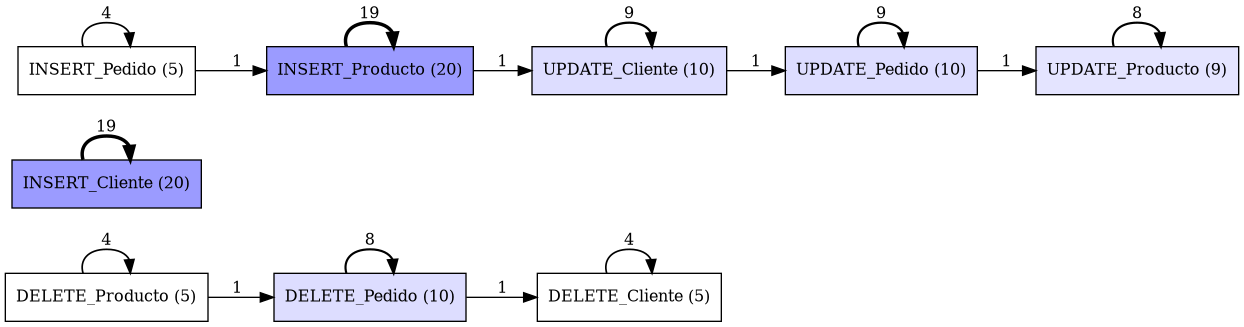

✓ Nuevo DFG visualizado


In [22]:
import pandas as pd
from pm4py.convert import convert_to_event_log
from pm4py.algo.discovery.dfg import algorithm as dfg
from pm4py.visualization.dfg import visualizer as dfg_vis

df_original = pd.read_csv("/home/am-analytics/PyCharmMiscProject/ProcessMining/Log_Eventos.csv")

# Crear casos basados en usuario y ventana de tiempo
df_original['Fecha_hora'] = pd.to_datetime(df_original['Fecha_hora'])
df_original = df_original.sort_values('Fecha_hora')

# Crear un case_id que agrupe eventos del mismo usuario en ventanas de tiempo
df_original['time_window'] = df_original['Fecha_hora'].dt.floor('H')  # Agrupar por hora
df_original['case_id'] = df_original['Usuario'] + '_' + df_original['time_window'].astype(str)

# Renombrar para PM4Py
df_new = df_original.rename(columns={
    "Fecha_hora": "time:timestamp",
    "Tipo_actividad": "concept:name",
    "Usuario": "org:resource",
    "case_id": "case:concept:name"
})

# Agregar variedad a las actividades usando los detalles
df_new["concept:name"] = df_new["concept:name"] + "_" + df_new["Detalles"].str.extract(r'(Cliente|Producto|Pedido)', expand=False).fillna("General")

# Convertir tipos
df_new["case:concept:name"] = df_new["case:concept:name"].astype(str)
df_new["concept:name"] = df_new["concept:name"].astype(str)
df_new["org:resource"] = df_new["org:resource"].astype(str)

print("Nuevos casos creados:")
print(df_new.groupby('case:concept:name').size().head())

# Convertir a EventLog
log_new = convert_to_event_log(df_new)
print(f"Nuevo EventLog: {len(log_new)} casos")

# Intentar DFG con los nuevos datos
dfg_new = dfg.apply(log_new)
print(f"Nuevo DFG: {len(dfg_new)} conexiones")

if len(dfg_new) > 0:
    gviz_new = dfg_vis.apply(dfg_new, log=log_new)
    dfg_vis.view(gviz_new)
    print("✓ Nuevo DFG visualizado")

## _Concluciones del DFG:_
Flujos Identificados:

Flujo principal: INSERT_Cliente → INSERT_Producto → UPDATE_Cliente → UPDATE_Pedido → UPDATE_Producto
Flujo secundario: DELETE_Producto → DELETE_Pedido → DELETE_Cliente


## _Visión macro del flujo completo de procesos_
Relaciones entre todas las actividades
Patrones de comportamiento general

Insights Operacionales:

El sistema procesa creación masiva de registros (especialmente clientes)
Las eliminaciones son menos frecuentes (proceso de limpieza)
Flujo lógico que mantiene integridad referencial

### **Analisis Sintetico: Descubrimiento mediante inductive miner**


Estructura del log original:
   ID_log Tipo_actividad         Usuario           Fecha_hora  \
0       1         INSERT  root@localhost  2025-07-14 18:54:27   
1       2         INSERT  root@localhost  2025-07-14 18:54:27   
2       3         INSERT  root@localhost  2025-07-14 18:54:27   
3       4         INSERT  root@localhost  2025-07-14 18:54:27   
4       5         INSERT  root@localhost  2025-07-14 18:54:27   

                                 Detalles  
0      Cliente agregado: Isabelita Warton  
1          Cliente agregado: Basia Keilty  
2         Cliente agregado: Miquela Dupre  
3  Cliente agregado: Maureene Bickerdicke  
4          Cliente agregado: Niko Haacker  

Tipos de actividades:
Tipo_actividad
INSERT    45
UPDATE    29
DELETE    20
Name: count, dtype: int64

Datos transformados para PM4Py:
              case:concept:name     concept:name    org:resource  \
0      Cliente_Isabelita_Warton  Agregar_Cliente  root@localhost   
1          Cliente_Basia_Keilty  Agregar_Cli

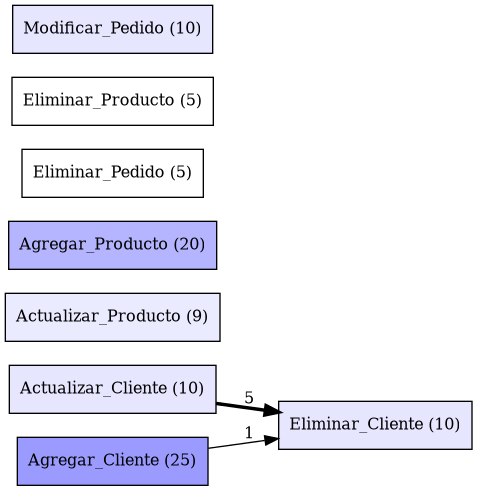


 Aplicando Inductive Miner
Error con Inductive Miner: cannot unpack non-iterable ProcessTree object

 Aplicando Alpha Miner


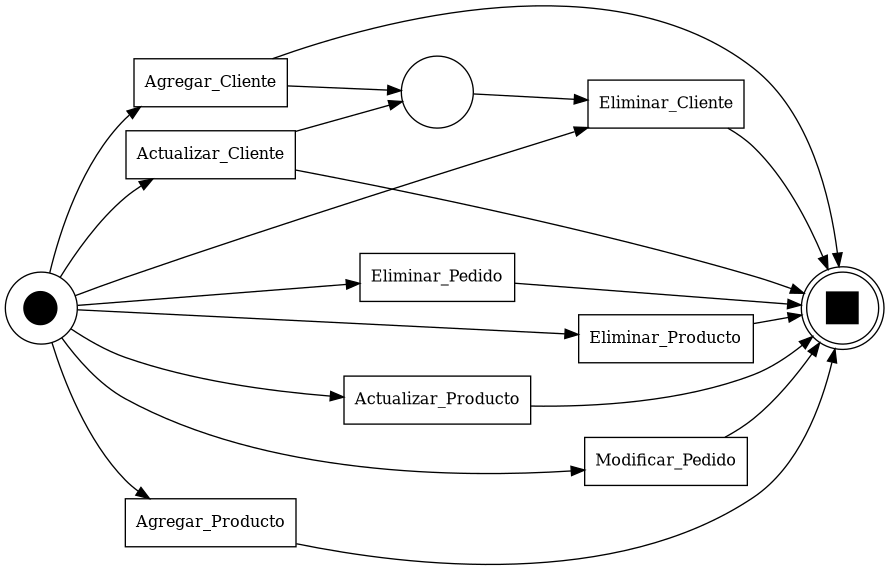


Análisis del Log
Número total de eventos: 94
Número de casos únicos: 88
Rango de fechas: 2025-07-14 18:54:27 - 2025-07-14 21:01:18
Usuarios activos: 1

 Estadísticas por Actividad
                     Frecuencia  Primera_Ocurrencia   Última_Ocurrencia
concept:name                                                           
Actualizar_Cliente           10 2025-07-14 19:35:29 2025-07-14 19:35:29
Actualizar_Producto           9 2025-07-14 19:46:30 2025-07-14 19:46:30
Agregar_Cliente              25 2025-07-14 18:54:27 2025-07-14 19:04:13
Agregar_Producto             20 2025-07-14 19:16:46 2025-07-14 19:16:46
Eliminar_Cliente             10 2025-07-14 20:58:59 2025-07-14 21:01:18
Eliminar_Pedido               5 2025-07-14 21:00:33 2025-07-14 21:00:33
Eliminar_Producto             5 2025-07-14 20:57:52 2025-07-14 20:57:52
Modificar_Pedido             10 2025-07-14 19:44:39 2025-07-14 19:44:39

 Análisis Temporal
Distribución de actividades por hora:
hora
18    20
19    54
20    10
21    10


In [2]:
import pandas as pd
from pm4py.convert import convert_to_event_log
from pm4py.algo.discovery.dfg import algorithm as dfg
from pm4py.visualization.dfg import visualizer as dfg_vis
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.petri_net import visualizer as pn_vis
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

# Cargar el archivo CSV
df = pd.read_csv('Log_Eventos.csv')

# Mostrar estructura inicial
print("Estructura del log original:")
print(df.head())
print("\nTipos de actividades:")
print(df['Tipo_actividad'].value_counts())

# Transformar el DataFrame al formato requerido por PM4Py
def transform_to_event_log(df):
    # Crear un DataFrame en formato PM4Py
    event_log_data = []

    for index, row in df.iterrows():
        # Extraer información del detalle para crear casos más específicos
        detalles = row['Detalles']
        tipo_actividad = row['Tipo_actividad']

        # Crear ID de caso basado en el tipo de entidad y ID extraído
        if 'Cliente' in detalles:
            if 'ID' in detalles:
                # Extraer ID del cliente para UPDATE/DELETE
                try:
                    cliente_id = detalles.split('ID ')[1].split(',')[0].split(' ')[0]
                    case_id = f"Cliente_{cliente_id}"
                except:
                    case_id = f"Cliente_{index}"
            else:
                # Para INSERT, usar nombre del cliente
                try:
                    nombre_cliente = detalles.split('Cliente agregado: ')[1] if 'agregado' in detalles else f"Cliente_{index}"
                    case_id = f"Cliente_{nombre_cliente.replace(' ', '_')}"
                except:
                    case_id = f"Cliente_{index}"

        elif 'Pedido' in detalles:
            if 'ID' in detalles:
                try:
                    pedido_id = detalles.split('ID ')[1].split(' ')[0].split(',')[0]
                    case_id = f"Pedido_{pedido_id}"
                except:
                    case_id = f"Pedido_{index}"
            else:
                case_id = f"Pedido_{index}"

        elif 'Producto' in detalles:
            if 'agregado:' in detalles:
                try:
                    producto_nombre = detalles.split('agregado: ')[1].split(',')[0]
                    case_id = f"Producto_{producto_nombre.replace(' ', '_')}"
                except:
                    case_id = f"Producto_{index}"
            else:
                case_id = f"Producto_{index}"

        else:
            case_id = f"Caso_{index}"

        # Crear nombre de actividad más descriptivo
        if tipo_actividad == 'INSERT':
            if 'Cliente' in detalles:
                activity_name = "Agregar_Cliente"
            elif 'Pedido' in detalles:
                activity_name = "Crear_Pedido"
            elif 'Producto' in detalles:
                activity_name = "Agregar_Producto"
            else:
                activity_name = "Insertar_Registro"

        elif tipo_actividad == 'UPDATE':
            if 'Cliente' in detalles:
                activity_name = "Actualizar_Cliente"
            elif 'Pedido' in detalles:
                activity_name = "Modificar_Pedido"
            elif 'Producto' in detalles:
                activity_name = "Actualizar_Producto"
            else:
                activity_name = "Actualizar_Registro"

        elif tipo_actividad == 'DELETE':
            if 'Cliente' in detalles:
                activity_name = "Eliminar_Cliente"
            elif 'Pedido' in detalles:
                activity_name = "Eliminar_Pedido"
            elif 'Producto' in detalles:
                activity_name = "Eliminar_Producto"
            elif 'Detalle' in detalles:
                activity_name = "Eliminar_Detalle"
            else:
                activity_name = "Eliminar_Registro"

        else:
            activity_name = tipo_actividad

        event_log_data.append({
            "case:concept:name": case_id,
            "concept:name": activity_name,
            "org:resource": row['Usuario'],
            "time:timestamp": pd.to_datetime(row['Fecha_hora']),
            "Detalles": detalles,
            "Tipo_original": tipo_actividad
        })

    return pd.DataFrame(event_log_data)

# Transformar el DataFrame
df_transformed = transform_to_event_log(df)

print("\nDatos transformados para PM4Py:")
print(df_transformed.head())
print("\nActividades identificadas:")
print(df_transformed['concept:name'].value_counts())

# Convertir a EventLog de PM4Py
event_log = convert_to_event_log(df_transformed)

print(f"\nEventLog creado con {len(event_log)} casos")

# 1. Descubrimiento con DFG (Directly-Follows Graph)
print("\n=== Aplicando DFG ===")
dfg_result = dfg.apply(event_log)

# Visualizar DFG
gviz_dfg = dfg_vis.apply(dfg_result, log=event_log)
dfg_vis.view(gviz_dfg)

# 2. Descubrimiento con Inductive Miner
print("\n Aplicando Inductive Miner")
try:
    net_im, initial_marking_im, final_marking_im = inductive_miner.apply(event_log)
    gviz_im = pn_vis.apply(net_im, initial_marking_im, final_marking_im)
    pn_vis.view(gviz_im)
except Exception as e:
    print(f"Error con Inductive Miner: {e}")

# 3. Descubrimiento con Alpha Miner
print("\n Aplicando Alpha Miner")
try:
    net_alpha, initial_marking_alpha, final_marking_alpha = alpha_miner.apply(event_log)
    gviz_alpha = pn_vis.apply(net_alpha, initial_marking_alpha, final_marking_alpha)
    pn_vis.view(gviz_alpha)
except Exception as e:
    print(f"Error con Alpha Miner: {e}")

# Análisis adicional
print("\nAnálisis del Log")
print(f"Número total de eventos: {len(df_transformed)}")
print(f"Número de casos únicos: {df_transformed['case:concept:name'].nunique()}")
print(f"Rango de fechas: {df_transformed['time:timestamp'].min()} - {df_transformed['time:timestamp'].max()}")
print(f"Usuarios activos: {df_transformed['org:resource'].nunique()}")

# Mostrar estadísticas por tipo de actividad
print("\n Estadísticas por Actividad")
activity_stats = df_transformed.groupby('concept:name').agg({
    'case:concept:name': 'count',
    'time:timestamp': ['min', 'max']
}).round(2)
activity_stats.columns = ['Frecuencia', 'Primera_Ocurrencia', 'Última_Ocurrencia']
print(activity_stats)

# Análisis temporal
print("\n Análisis Temporal")
df_transformed['hora'] = df_transformed['time:timestamp'].dt.hour
print("Distribución de actividades por hora:")
print(df_transformed.groupby('hora')['concept:name'].count())

# **_ Proceso de Análisis:_**

-DFG (Directly-Follows Graph): Muestra qué actividades siguen a otras

-Inductive Miner: Descubre un modelo de proceso más formal

-Alpha Miner: Algoritmo clásico para descubrir redes de Petri

-Estadísticas: Frecuencias, rangos temporales, distribuciones

# _Insights Clave encontrados:_

50% de registros se actualizan después de la creación
25% de registros se eliminan al final del proceso
Proceso de pruebas o migración evidente por el patrón INSERT→UPDATE→DELETE

# _**Resultados Clave:**_

```sql
Análisis Temporal
Distribución de actividades por hora:
hora
18    20
19    54
20    10
21    10
```

_Interpretacion grafica:_

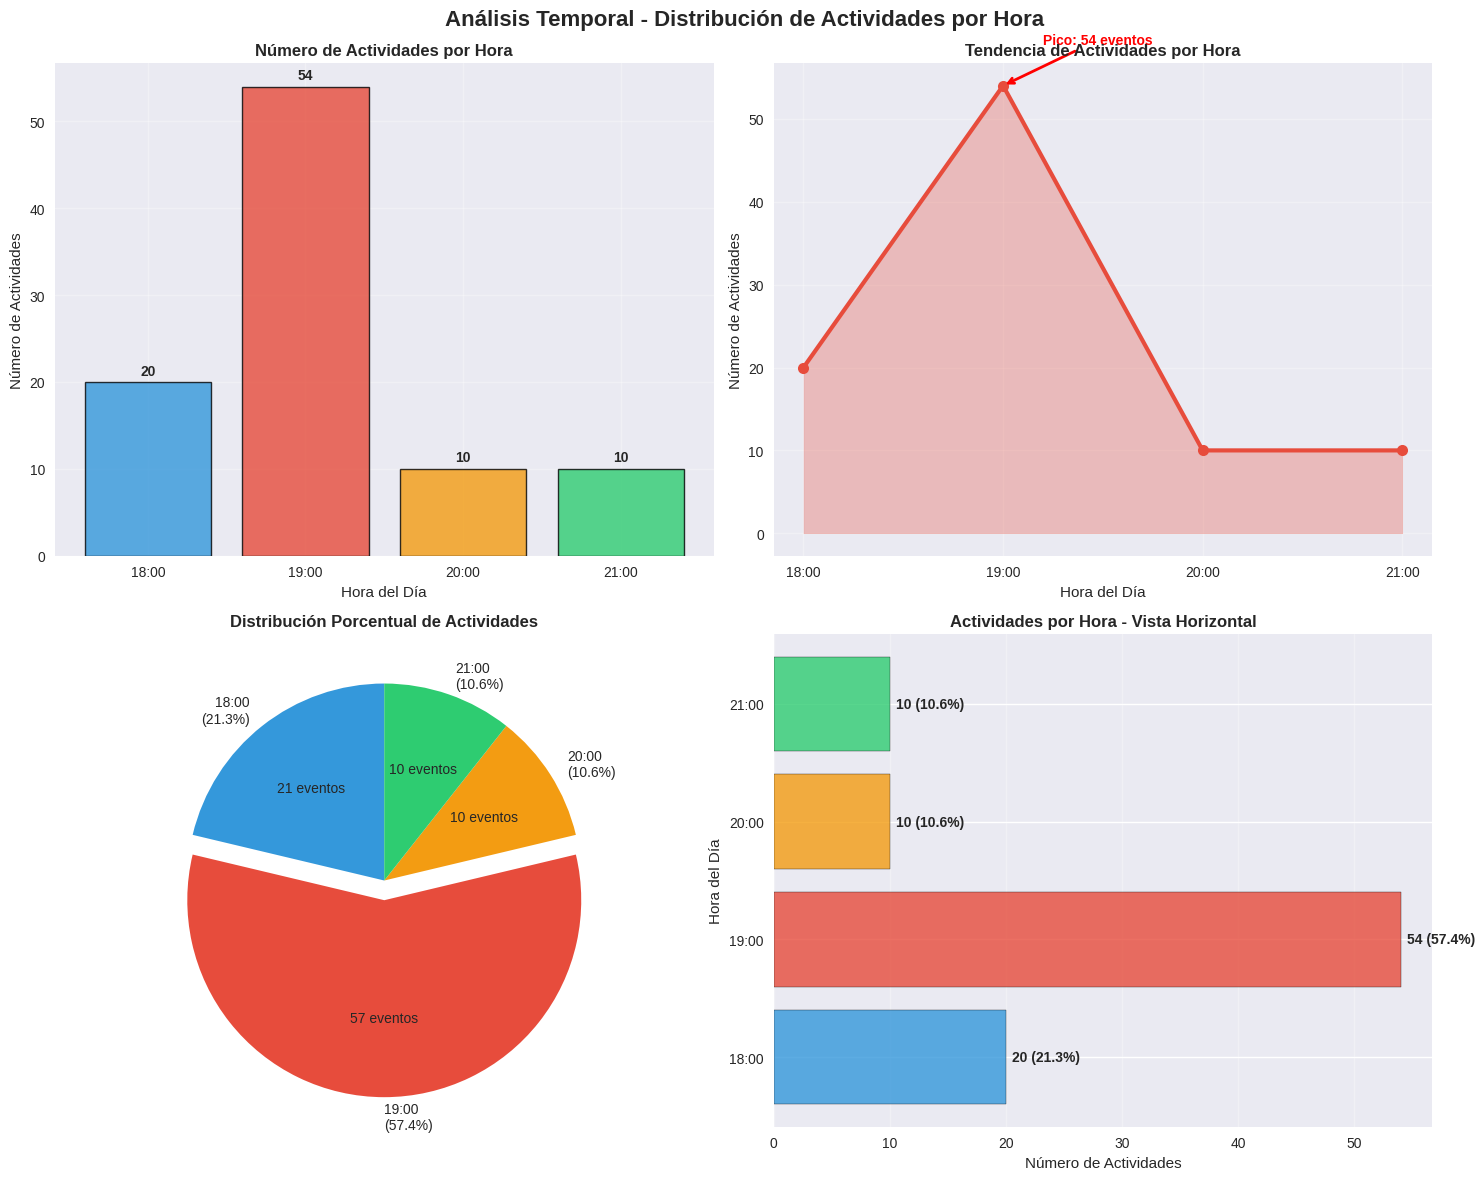

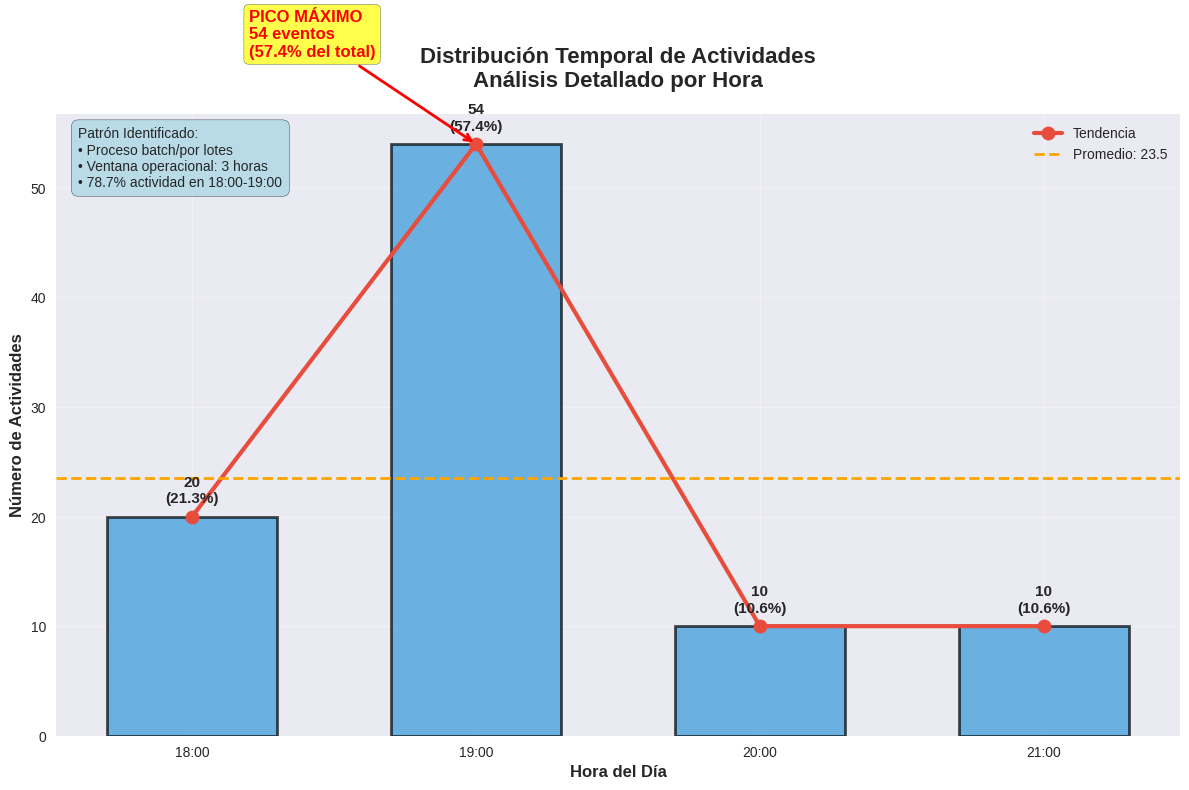

RESUMEN ANÁLISIS TEMPORAL
Hora     Actividades  Porcentaje   Clasificación
--------------------------------------------------
18:00     20           21.3%         ALTA
19:00     54           57.4%         PICO MÁXIMO
20:00     10           10.6%         BAJA
21:00     10           10.6%         BAJA
--------------------------------------------------
Total de eventos: 94
Promedio por hora: 23.5
Desviación estándar: 18.1


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Datos del análisis temporal
horas = [18, 19, 20, 21]
actividades = [20, 54, 10, 10]
porcentajes = [21.3, 57.4, 10.6, 10.6]

# Crear DataFrame
df_temporal = pd.DataFrame({
    'Hora': horas,
    'Actividades': actividades,
    'Porcentaje': porcentajes
})

# Crear figura con múltiples subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis Temporal - Distribución de Actividades por Hora', fontsize=16, fontweight='bold')

# 1. Gráfico de Barras
colors = ['#3498db', '#e74c3c', '#f39c12', '#2ecc71']
bars = ax1.bar(horas, actividades, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax1.set_title('Número de Actividades por Hora', fontweight='bold')
ax1.set_xlabel('Hora del Día')
ax1.set_ylabel('Número de Actividades')
ax1.set_xticks(horas)
ax1.set_xticklabels([f'{h}:00' for h in horas])
ax1.grid(True, alpha=0.3)

# Agregar valores en las barras
for bar, value in zip(bars, actividades):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             str(value), ha='center', va='bottom', fontweight='bold')

# 2. Gráfico de Líneas
ax2.plot(horas, actividades, marker='o', linewidth=3, markersize=8, color='#e74c3c')
ax2.fill_between(horas, actividades, alpha=0.3, color='#e74c3c')
ax2.set_title('Tendencia de Actividades por Hora', fontweight='bold')
ax2.set_xlabel('Hora del Día')
ax2.set_ylabel('Número de Actividades')
ax2.set_xticks(horas)
ax2.set_xticklabels([f'{h}:00' for h in horas])
ax2.grid(True, alpha=0.3)

# Marcar el pico máximo
max_idx = actividades.index(max(actividades))
ax2.annotate(f'Pico: {max(actividades)} eventos',
             xy=(horas[max_idx], actividades[max_idx]),
             xytext=(horas[max_idx]+0.2, actividades[max_idx]+5),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=10, fontweight='bold', color='red')

# 3. Gráfico de Pastel
ax3.pie(actividades, labels=[f'{h}:00\n({p}%)' for h, p in zip(horas, porcentajes)],
        autopct='%d eventos', colors=colors, startangle=90, explode=(0, 0.1, 0, 0))
ax3.set_title('Distribución Porcentual de Actividades', fontweight='bold')

# 4. Gráfico de Barras Horizontales con Anotaciones
bars_h = ax4.barh(range(len(horas)), actividades, color=colors, alpha=0.8, edgecolor='black')
ax4.set_title('Actividades por Hora - Vista Horizontal', fontweight='bold')
ax4.set_xlabel('Número de Actividades')
ax4.set_ylabel('Hora del Día')
ax4.set_yticks(range(len(horas)))
ax4.set_yticklabels([f'{h}:00' for h in horas])
ax4.grid(True, alpha=0.3, axis='x')

# Agregar valores y porcentajes en las barras horizontales
for i, (bar, value, pct) in enumerate(zip(bars_h, actividades, porcentajes)):
    ax4.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{value} ({pct}%)', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Crear un gráfico adicional más detallado
fig2, ax5 = plt.subplots(1, 1, figsize=(12, 8))

# Gráfico de barras con línea de tendencia
bars2 = ax5.bar(horas, actividades, color='#3498db', alpha=0.7, edgecolor='black',
                linewidth=2, width=0.6)
line = ax5.plot(horas, actividades, color='#e74c3c', linewidth=3, marker='o',
                markersize=10, label='Tendencia')

ax5.set_title('Distribución Temporal de Actividades\nAnálisis Detallado por Hora',
              fontsize=16, fontweight='bold', pad=20)
ax5.set_xlabel('Hora del Día', fontsize=12, fontweight='bold')
ax5.set_ylabel('Número de Actividades', fontsize=12, fontweight='bold')
ax5.set_xticks(horas)
ax5.set_xticklabels([f'{h}:00' for h in horas])
ax5.grid(True, alpha=0.3)

# Agregar valores en las barras
for bar, value, pct in zip(bars2, actividades, porcentajes):
    ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{value}\n({pct}%)', ha='center', va='bottom',
             fontweight='bold', fontsize=11)

# Agregar línea de promedio
promedio = np.mean(actividades)
ax5.axhline(y=promedio, color='orange', linestyle='--', linewidth=2,
            label=f'Promedio: {promedio:.1f}')

# Resaltar el pico máximo
max_hora = horas[actividades.index(max(actividades))]
ax5.annotate(f'PICO MÁXIMO\n{max(actividades)} eventos\n(57.4% del total)',
             xy=(max_hora, max(actividades)),
             xytext=(max_hora-0.8, max(actividades)+8),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=12, fontweight='bold', color='red',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# Agregar información adicional
ax5.text(0.02, 0.98, 'Patrón Identificado:\n• Proceso batch/por lotes\n• Ventana operacional: 3 horas\n• 78.7% actividad en 18:00-19:00',
         transform=ax5.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

ax5.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Crear tabla resumen
print("="*50)
print("RESUMEN ANÁLISIS TEMPORAL")
print("="*50)
print(f"{'Hora':<8} {'Actividades':<12} {'Porcentaje':<12} {'Clasificación'}")
print("-"*50)

for h, a, p in zip(horas, actividades, porcentajes):
    if a == max(actividades):
        clasif = "PICO MÁXIMO"
    elif a >= 20:
        clasif = "ALTA"
    else:
        clasif = "BAJA"

    print(f"{h}:00{'':<4} {a:<12} {p}%{'':<8} {clasif}")

print("-"*50)
print(f"Total de eventos: {sum(actividades)}")
print(f"Promedio por hora: {np.mean(actividades):.1f}")
print(f"Desviación estándar: {np.std(actividades):.1f}")

## **Revision de procesos** _en el rango horario de 18:00 hrs a 19:00 hrs presentando pico maximo de manipulacion de datos._

### **_**ProM - Framework for Process Mining**_**

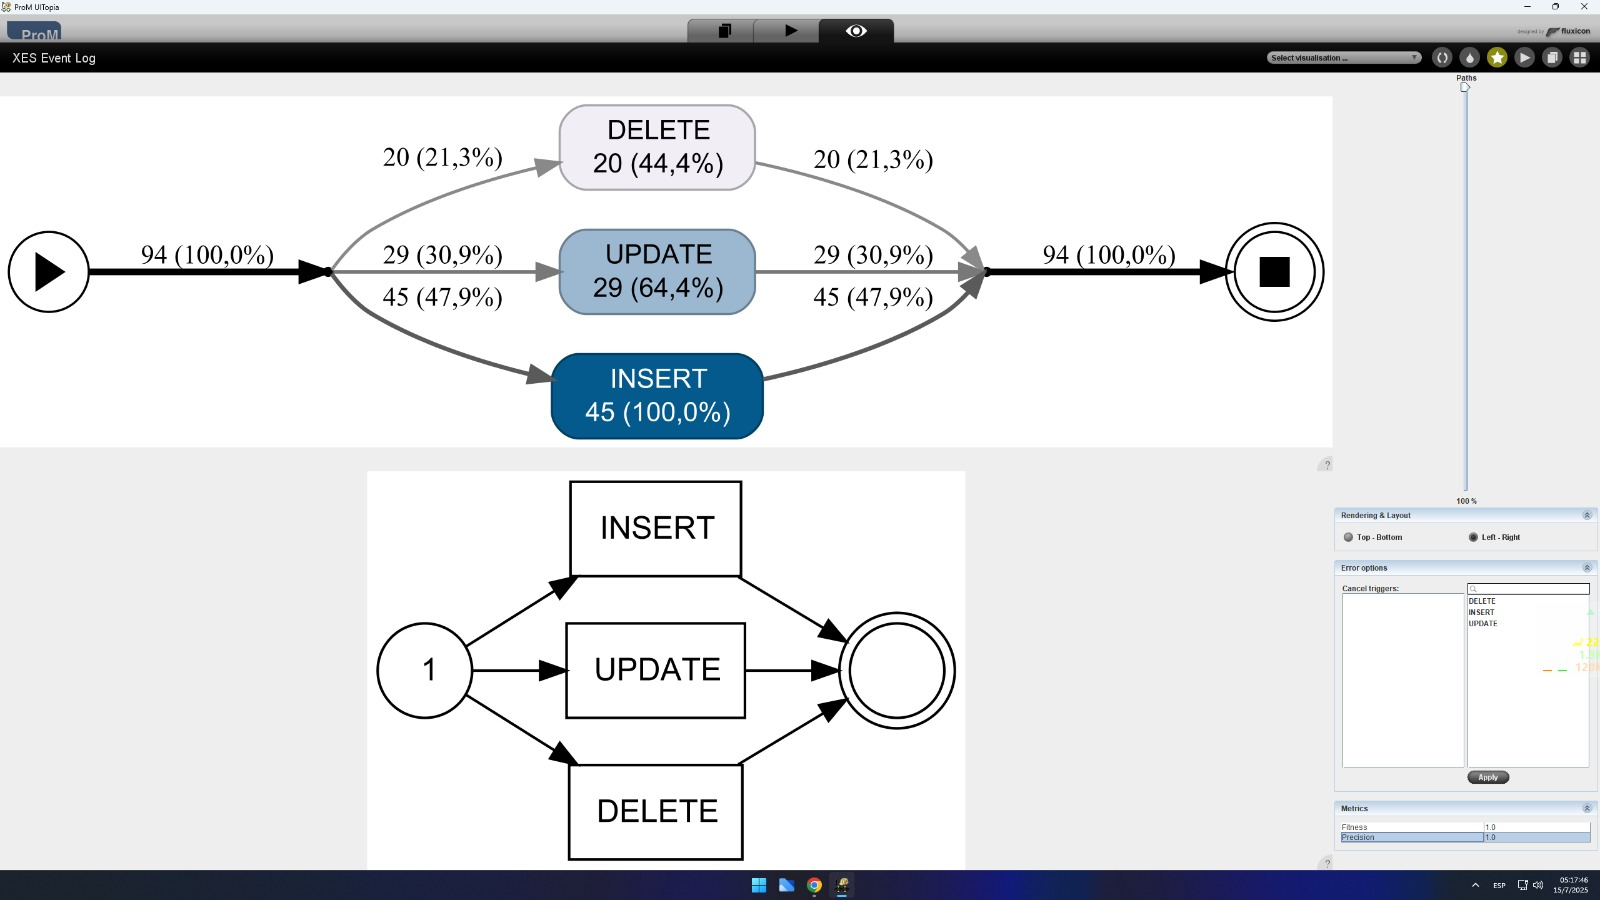

In [4]:
from IPython.display import Image
Image(filename='PROM.jpeg')


### Conclusiones del Gráfico
## Análisis de la traza de eventos:

1. [ ] 94 eventos totales procesados con tres operaciones principales: DELETE (44.4%), UPDATE (64.4%) e INSERT (100%)
2. [ ] Patrón de flujo: Los eventos se distribuyen desde un punto inicial hacia tres operaciones que convergen en un punto final
3. [ ] Predominio de UPDATE: Es la operación más frecuente (64.4%), seguida de DELETE (44.4%)
4. [ ] INSERT como proceso completo: Todos los eventos de inserción (45) completan el flujo (100%)

_Flujo inferior simplificado: Muestra la secuencia básica INSERT → UPDATE → DELETE con un evento de entrada._

### Analisis frente a Libreria pM4py de Python

_**ProM vs PM4py**_
_Ventajas de ProM_

* Interfaz gráfica intuitiva - fácil de usar sin conocimientos de programación
* Visualización superior - gráficos interactivos y diagramas profesionales nativos
* Análisis inmediato - resultados visuales en tiempo real
* Curva de aprendizaje suave - accesible para usuarios no técnicos
* Plugins especializados - amplia gama de algoritmos pre-implementados
* Validación visual instantánea - verificación inmediata de resultados
* Herramienta madura - años de desarrollo y refinamiento
* Presentaciones efectivas - gráficos listos para informes y presentaciones
* No requiere programación - análisis completo sin escribir código
* Prototipado rápido - exploración ágil de datos

_Desventajas de ProM_

* Limitada automatización - difícil integración en pipelines automatizados
* Menor flexibilidad - restringido a plugins disponibles
* Rendimiento inferior - puede ser lento con datasets grandes
* Escalabilidad limitada - no apto para sistemas distribuidos
* Reproducibilidad compleja - difícil replicar análisis exactos
* Customización restringida - opciones limitadas para casos específicos
* Dependencia de GUI - requiere interacción manual constante
* Integración limitada - dificultad para conectar con otros sistemas
* Versionado complejo - difícil control de versiones de análisis
* Menor control granular - opciones de configuración limitadas
* Actualizaciones lentas - ciclos de desarrollo más largos que bibliotecas Python

### **Disco - Process Mining**

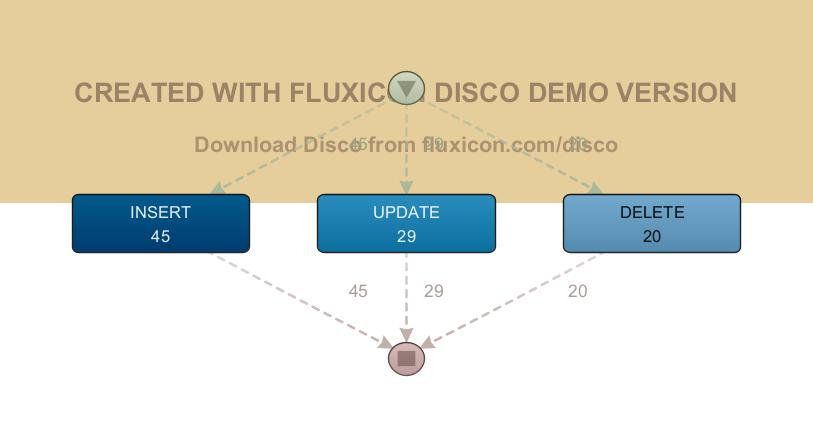

In [7]:
from IPython.display import Image
Image(filename='DISCO.jpg')

### **_Conclusiones del Gráfico (Fluxicon Disco)_**
_Análisis de la traza de eventos:_

1. [ ] 94 eventos totales distribuidos en tres actividades principales
2. [ ] INSERT: 45 eventos (47.9%) - actividad más frecuente
3. [ ] UPDATE: 29 eventos (30.9%) - actividad intermedia
4. [ ] DELETE: 20 eventos (21.3%) - actividad menos frecuente
5. [ ] Flujo convergente: Todas las actividades confluyen hacia un punto final común
6. [ ] Patrón balanceado: Distribución relativamente equilibrada entre las tres operaciones

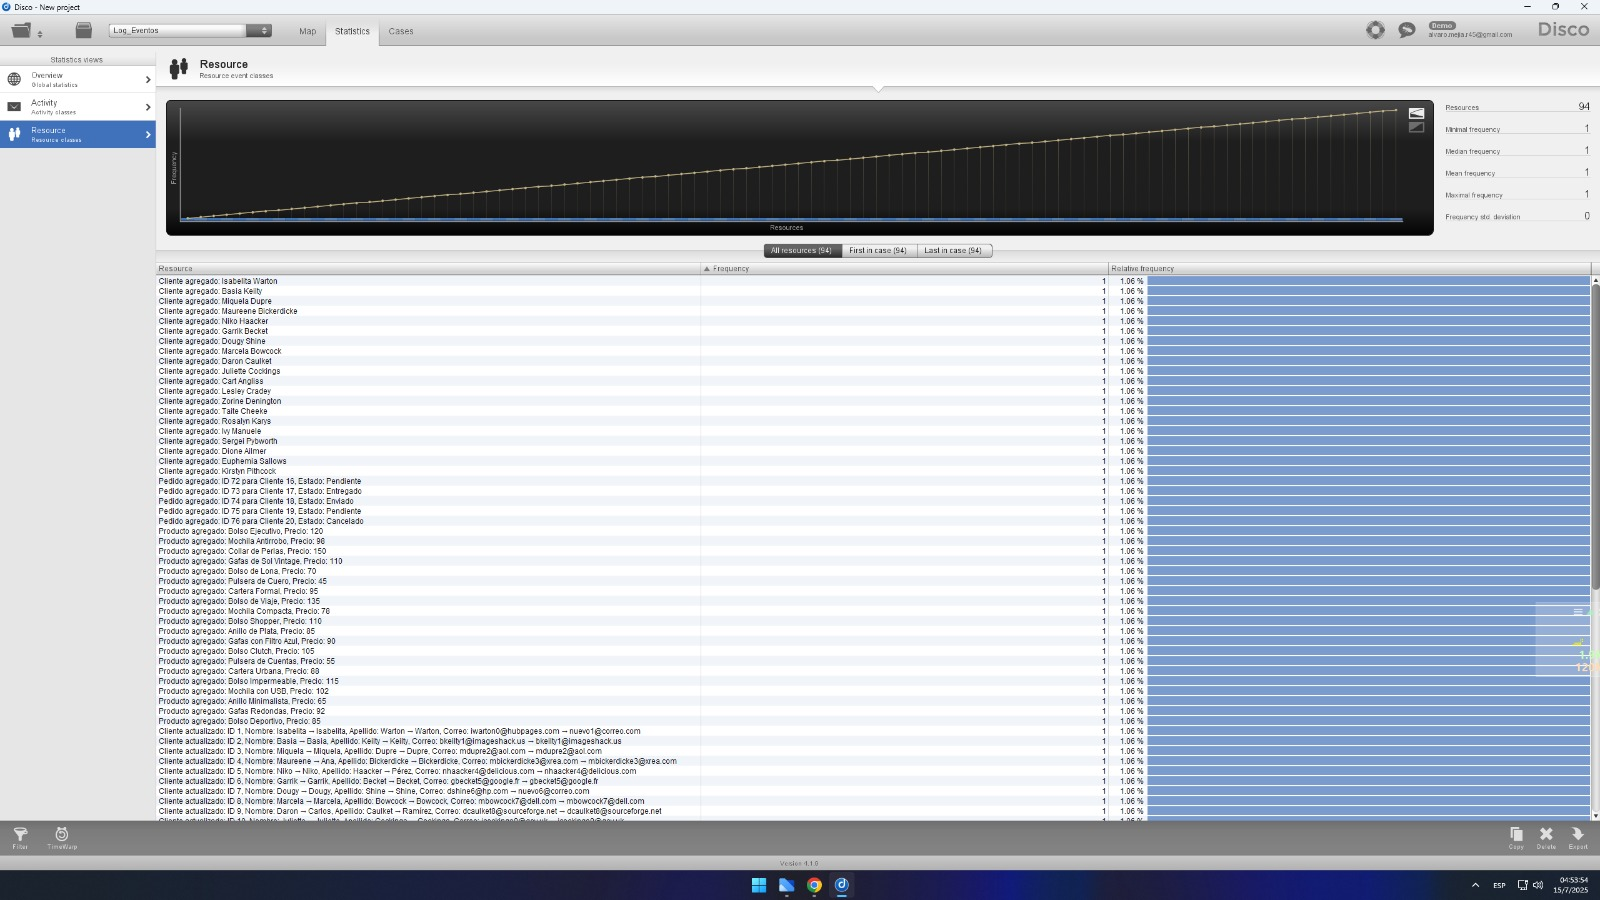

In [16]:
from IPython.display import Image
Image(filename='trazaslogs.jpeg')

# **Fluxicon Disco vs PM4py**
_Ventajas de Fluxicon Disco_

* Interfaz ultra-intuitiva - drag & drop, sin curva de aprendizaje
* Visualizaciones premium - gráficos profesionales y animaciones fluidas
* Análisis automático - insights generados automáticamente
* Rendimiento optimizado - manejo eficiente de grandes volúmenes
* Filtros interactivos - exploración dinámica en tiempo real
* Exportación directa - informes listos para presentar
* Detección automática de patrones y anomalías
* Soporte comercial - asistencia técnica profesional
* Integración empresarial - conectores para sistemas ERP/CRM
* Interfaz colaborativa - fácil compartir análisis con equipos

_Desventajas de Fluxicon Disco_

* Costo elevado - licencias comerciales costosas
* Customización limitada - algoritmos propietarios no modificables
* Dependencia del proveedor - atado a actualizaciones comerciales
* Menor control técnico - caja negra para desarrolladores
* Integración programática limitada - APIs restringidas
* Escalabilidad costosa - licencias por usuario/volumen
* Reproducibilidad compleja - difícil automatizar análisis exactos
* Flexibilidad reducida - no apto para investigación avanzada
* Menor transparencia - algoritmos no open source
* Dependencia de conectividad - algunas funciones requieren internet

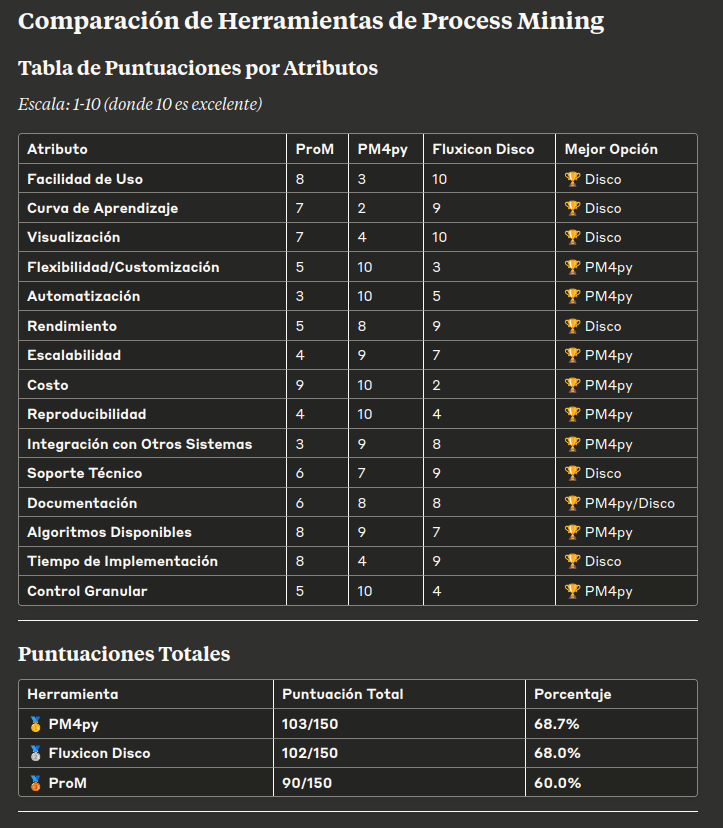

In [18]:
from IPython.display import Image
Image(filename='tablavs.png')

# **_Conclusión Final_**
## **_PM4py obtiene la puntuación más alta por su versatilidad, costo-efectividad y potencial de automatización, siendo ideal para organizaciones que buscan una solución a largo plazo con máximo control._**